<h1>Part 1: Python Programming (30 points)</h1>

Tristan Lambert

In [1]:
##Tristan Lambert | tlambe15 | GEOG312_Final_Exam_Fall23

from datetime import datetime

now = datetime.now()
print(f"Submitted time: {now}")

Submitted time: 2023-12-13 23:46:11.443838


1. Data Manipulation (5 points): Write a Python function that takes a list of lists representing points (latitude, longitude) and returns the average latitude and average longitude.

In [1]:
def pointAverage(points):
    lat_sum = 0
    lon_sum = 0

    for point in points:
        lat_sum = lat_sum + point[0]
        lon_sum = lon_sum + point[1]

    return (lat_sum/len(points), lon_sum/len(points))


test_points = [(1,4), (3,2), (4,1)]
pointAverage(test_points)

(2.6666666666666665, 2.3333333333333335)

2. Conditional Statements (5 points): Write a Python program that reads a CSV file containing elevation data for points. The program should then identify and print the points with an elevation above a user-specified threshold

In [31]:
# I could not find an elevation csv, so I used a different data source I found online at: http://www.poi-factory.com/node/31781

import pandas as pd

df = pd.read_csv('./Jersey_Mikes.csv', header=None)
usr_in = float(input("Please enter a minimum latitude value: "))

print(f"Showing all Jersey Mike's locations for latitude values greater than {usr_in}")
df.rename(columns={0: 'lat', 1: 'lon', 2: 'location', 3: 'address'}, inplace=True)
df = df[df['lat'] > usr_in]
print(df)

Showing all Jersey Mike's locations for latitude values greater than -200.0
             lat        lon                      location  \
0    -149.845366  61.141367    Jersey Mike's-Anchorage,AK   
1    -149.413511  61.578580      Jersey Mike's-Wasilla,AK   
2     -86.812758  33.256495    Jersey Mike's-Alabaster,AL   
3     -85.502288  32.565717       Jersey Mike's-Auburn,AL   
4     -86.841370  34.142270      Jersey Mike's-Cullman,AL   
...          ...        ...                           ...   
2666  -80.599677  40.060021  Jersey Mike's-Triadelphia,WV   
2667  -81.550276  39.306092       Jersey Mike's-Vienna,WV   
2668 -106.363658  42.815123       Jersey Mike's-Casper,WY   
2669 -106.262237  42.847820       Jersey Mike's-Casper,WY   
2670 -105.553823  41.309025      Jersey Mike's-Laramie,WY   

                                                address  
0     2001 East 88th Ave [ste 104], Anchorage,AK 995...  
1     1451 E Parks Hwy [ste 104], Wasilla,AK 99654-8...  
2     1114 1st St

3. Loops (5 points): Write a Python program that iterates through a dictionary containing county
names and their corresponding population densities. The program should calculate and print the
total population for all counties.
(Hint: Use a random number generator or google the population of your chosen cities to create
the values for the population density. Use 10 different city names.)


In [1]:
pop_density = {"Knoxville, TN": 192648,
               "Telford, TN":  1031,
               "Stockton, CA": 322120,
               "Kansas City, KA": 508394,
               "Riverside, CA": 317261,
               "Reno, NV": 268851,
               "North Hempstead, NY": 231117,
               "Greensboro, NC": 299175,
               "Jacksonville, FL": 954614,
               "Birmingham, AL": 197575
               }

pop_sum = 0

for k, v in pop_density.items():
    pop_sum = pop_sum + v


print(f"The total population of all the cities is: {pop_sum}")

The total population of all the cities is: 3292786


4. Functions with Arguments (5 points): Write a Python function that takes a shapefile path as
input and returns its area in square kilometers.


In [16]:
import geopandas as gpd

def shapfile_area(shape_path):
    df = gpd.read_file(shape_path)
    return df.geometry.area.sum()


shp_path = "./states_shapes/States_shapefile.shp"
area = shapfile_area(shp_path)
print(f"The total area of the shapefile is: {area} square kilometers")

The total area of the shapefile is: 1096.0819202741561 square kilometers


C:\Users\Nimda\AppData\Local\Temp\ipykernel_6020\4213905755.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return df.geometry.area.sum()


5. Error Handling (5 points): Write a Python program that attempts to read a raster file. If the file
is not found or invalid, the program should print a helpful error message and gracefully exit.


In [21]:
import rasterio

raster_file_path = './nsrdb3_dni.tif'

try:

    with rasterio.open(raster_file_path) as src:
        # Display basic information about the raster file
        print("Raster File Information:")
        print(f"Width: {src.width}")
        print(f"Height: {src.height}")
        print(f"Number of Bands: {src.count}")
        print(f"CRS (Coordinate Reference System): {src.crs}")
        print(f"Transform (Affine): {src.transform}")

except Exception:
    print(f"Failed to open file: {raster_file_path}...")



Raster File Information:
Width: 3940
Height: 2025
Number of Bands: 1
CRS (Coordinate Reference System): EPSG:4326
Transform (Affine): | 0.04, 0.00,-180.00|
| 0.00,-0.04, 59.99|
| 0.00, 0.00, 1.00|


<h1>Part 2: GIS Workflows (40 points) For this section you are not explicitly writing a python
program, but you are thinking through the problems and discussing the code that you
would use to solve the problem.</h1>

1. Problem-Solving (10 points): You are tasked with creating a program to identify areas suitable
for building a new solar farm. You have access to datasets for land cover, slope, and solar
radiation. Describe the workflow of your program, including data preparation, analysis steps, and
final output.

<font color="red">First, I would want to get all the datasets merged into one dataframe/dataset. Next, I'd try to filter out areas whose slope values are not suitable for building solar farms on. Then, I would filter out any areas that did not have a reasonable amount of land to build the farm onand then, I would want to filter out any areas where the solar radiation values where below a specific threshold. After that, I would sort the data by solar radiation and then by area so that the most ideal location are located at the top of the resulting dataset. All of this work could be done with geopandas.</font>

2. Critical Thinking (10 points): You are given a shapefile of earthquake epicenters and a raster
file of population density. Explain how you would use Python and GIS libraries to identify the
areas most vulnerable to earthquake damage, considering both population density and proximity
to epicenters

<font color="red">First, I would create a buffered region around the earthquake epicenters. Using that buffer I would select the population density within the buffered region. Finally, I would be able to rank the earthquake epicenters by effected population. This could all be done with geopandas. Visualizations would be extremely useful to hammer home the danger of the areas. To create the visualizations I would use matplotlib. </font>

3. Critical Thinking (10 points): You are tasked with creating a visualization that shows the
impacts of climate change on Tennessee agricultural production. You are given a dataset for
precipitation, temperature, and crop output. How would you go about visualizing this in python
and what analyses would need to be done to measure these impacts?

<font color="red">The datasets provided may not be exclusive to Tennessee, and as such additional resources would be neccessary to filter out data that was not related to Tennessee. Assuming that the datasets supplied are adequately historical. I would use matplotlib to produce a layered line plot that displayed the average precipitation per yer, tempature, and crop output over time. Additionally, the visualization could be made to be even more impactful if another layer was added to the plot that showed the carbon levels or emissions over the same time period. This would allow the audience to see the correlation more clearly. After the inital analysis of the result, I would create line's of best fit to show projected future values.</font>

4. Geospatial Analysis (10 points): You have a shapefile of national parks and a raster file of
deforestation rates. Design a Python program to calculate the total area of deforestation within
each national park and identify the park with the highest deforestation rate

<font color="red">
First, I would overlay the national park boundaries with the deforestation rate raster. Next, I would be able to create a dataset that mapped the deforestation rate to the national park. Finally, I would sort the dataset by deforestation rate. Then I would be able to analyze the national parks that had the highest deforestation rates. This analysis could be completed with a combination of rasterio and geopandas.
</font>

<h1>Part 3: Mapping with Python (30 points)</h1>

1. Shapefile Visualization (10 points): Write a Python program to read a shapefile. Create a map
showing the data points as colored polygons (anything other than circles). Each data point should
be colored based on its magnitude (e.g., green for small (low), yellow for medium (average), red
for large (high)).

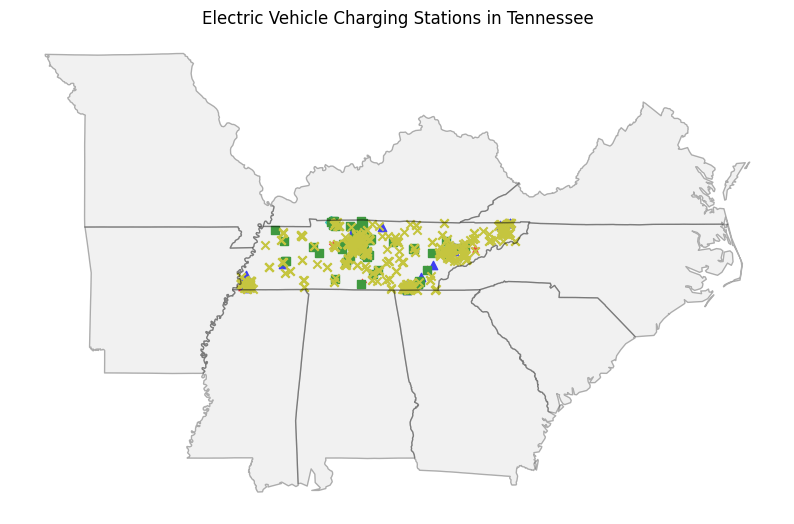

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = './points/points.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)
gdf['marker'] = gdf['Fuel Type'].map({'CNG': '*', 'LPG': '^', 'E85': 's', 'ELEC': 'x', 'LNG': '.', 'BD': 'D'})
gdf['color'] = gdf['Fuel Type'].map({'CNG': 'r', 'LPG': 'b', 'E85': 'g', 'ELEC': 'y', 'LNG': 'm', 'BD': 'c'})
# Fuel Types: 'CNG' 'LPG' 'E85' 'ELEC' 'LNG' 'BD'

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the shapefile on the axis
for style, d in gdf.groupby(['marker', 'color']):
    # if there was a magnitude value to use, I would have made another 
    # column to group the values and used the style tuple to set the 'markersize'
    d.plot(ax=ax, color=style[1], marker=style[0])

shapefile_path = './states_shapes/States_shapefile.shp'
gdf = gpd.read_file(shapefile_path)
# bounding box near TN
# 34.849847, -90.521052
# 36.671510, -81.494047
bbox = (-90.521052, 34.849847, 81.494047, 36.671510)
gdf_zoomed = gdf.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]
gdf_zoomed.plot(ax=ax, color='lightgray', edgecolor='k', alpha = 0.3)

# Customize the map appearance (optional)
ax.set_title('Electric Vehicle Charging Stations in Tennessee')
ax.set_axis_off()

# Display the map
# plt.title('Map of Tennessee')
plt.show()


2. Raster Processing and Visualization (10 points): Write a Python program to read a raster file of
precipitation data and apply a colormap to visualize the temperature variations. Add a legend to
the map and ensure clear labels for axes and title.
*Hint: Use the precipitation dataset already provided to you

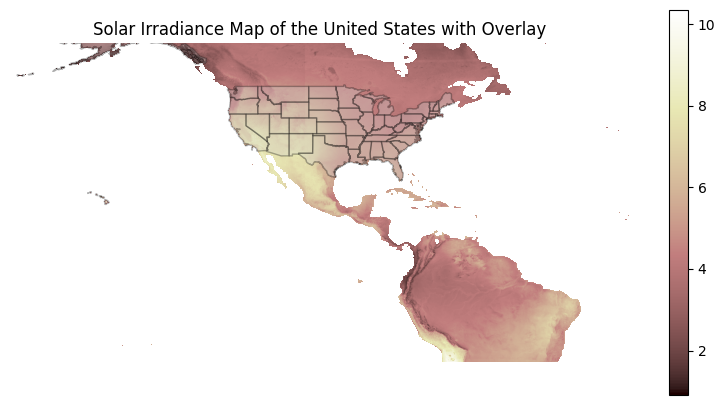

In [120]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Define the path to the shapefile of the United States (or any shapefile)
shapefile_path = './states_shapes/States_shapefile.shp'

# Define the path to the raster image you want to overlay
raster_file_path = './nsrdb3_dni.tif'

# Read the shapefile (United States boundaries)
gdf = gpd.read_file(shapefile_path)

# Open the raster image
with rasterio.open(raster_file_path) as src:
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the shapefile (United States boundaries)
    gdf.plot(ax=ax, color='lightgray', edgecolor='k', alpha = 0.3)
    


    # Overlay the raster image on top of the shapefile
    s = show(src, ax=ax, cmap='pink')


    im = s.get_images()[0]
    fig.colorbar(im, ax=ax, shrink=.5)
    
    # Customize the map appearance (optional)
    ax.set_title('Solar Irradiance Map of the United States with Overlay')
    ax.set_axis_off()
    
    # Display the map
    plt.show()

3. Cartographic Design (10 points): Design a map showing the distribution of solar farms in
west, middle, and east Tennessee. Create a raster layer that summarizes the total energy
generated from the solar farms in each of these regions (it can be one raster layer). Discuss which
region has the most solar production and why.


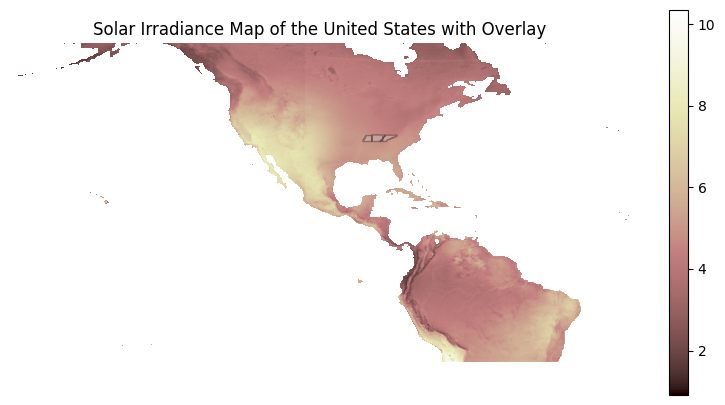

In [130]:
# I didn't have access to a dataset similar to the one listed above.
# I could not figure out how to zoom to the boundary file with respect to the raster.


import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# Define the path to the shapefile of the United States (or any shapefile)
shapefile_path = './grand_divisions_tn.geojson'

# Define the path to the raster image you want to overlay
raster_file_path = './nsrdb3_dni.tif'

# Read the shapefile (United States boundaries)
gdf = gpd.read_file(shapefile_path)


# Open the raster image
with rasterio.open(raster_file_path, 'r') as src:
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the shapefile (United States boundaries)bbox = (-90.521052, 34.849847, 81.494047, 36.671510)
    gdf_zoomed = gdf.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]
    gdf_zoomed.plot(ax=ax, color='lightgray', edgecolor='k', alpha = 0.3)

    # Overlay the raster image on top of the shapefile
    s = show(src, ax=ax, cmap='pink')


    im = s.get_images()[0]
    fig.colorbar(im, ax=ax, shrink=.5)
    
    # Customize the map appearance (optional)
    ax.set_title('Solar Irradiance Map of the United States with Overlay')
    ax.set_axis_off()
    
    # Display the map
    plt.show()

<h1>Bonus Question (10 points):</h1>

Develop a Python program that automates a repetitive GIS task you encountered during your
project or coursework. Explain the task, your approach, and the benefits of automation.

In [112]:
import os
import geopandas as gpd

def read_spatial(shape_path):
    """
    Reads spatial data from shape file and returns a geopandas dataframe
    This function also converts the input source to geojson and
    writes it to disk.
    """
    try:
        file_name = os.path.basename(shape_path).split('.')[0]
        gdf = gpd.read_file(shape_path)
        gdf.to_file(f"{file_name}.geojson", driver="GeoJSON")
        return gdf
    except:
        print(f"Failed to load file '{shape_path}'...")
        return None

df = read_spatial(shape_path='./states_shapes/States_shapefile.shp')
print(df)


    FID          Program State_Code            State_Name Flowing_St  FID_1  \
0     1  PERMIT TRACKING         AL               ALABAMA          F    919   
1     2             None         AK                ALASKA          N    920   
2     3          AZURITE         AZ               ARIZONA          F    921   
3     4              PDS         AR              ARKANSAS          F    922   
4     5             None         CA            CALIFORNIA          N    923   
5     6           ECOMAP         CO              COLORADO          F    924   
6     7             SIMS         CT           CONNECTICUT          F    925   
7     8             None         DE              DELAWARE          P    926   
8     9             None         DC  DISTRICT OF COLUMBIA          P    927   
9    10             None         FL               FLORIDA          P    928   
10   11             None         GA               GEORGIA          N    929   
11   12           HI-EHW         HI                H

<font color="red">I think this function would be useful because I find shape files can be tedious to deal with. There are multiple files that come along with a shape file, so if we can convert it to geojson as we load it in, we won't have to tote around many different files and we can focus more on the work at hand as opposed to de-cluttering our working directory with shapefiles.</font>